In [1]:
# This line is needed to use animations in jupyter notebooks, and also, this way the plots can be resized
%matplotlib notebook
#%matplotlib inline

import random
from itertools import count

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Example data

In [2]:
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

"Normal" plot

<IPython.core.display.Javascript object>


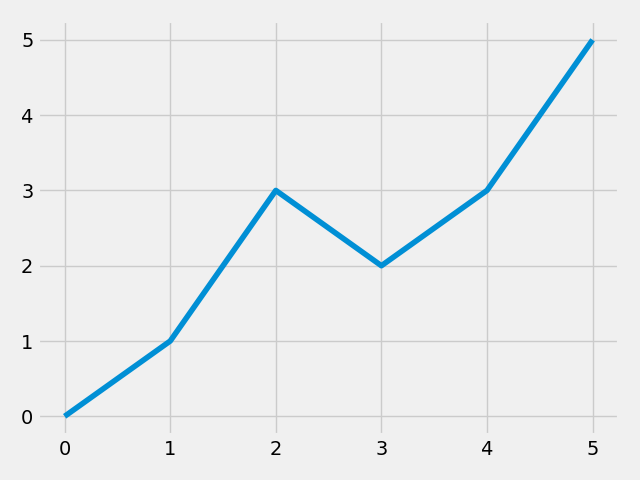

In [3]:
plt.plot(x_vals, y_vals)

plt.tight_layout()
plt.show()

To create "animated" graphics, we need to:

1. have a "values"-generator
2. to import the FuncAnimation from matplotlib
3. Use this function to create the graph

Ok. Let's first import what we need...

In [4]:
from matplotlib.animation import FuncAnimation

Now define a function to generate some "sample" data in the fly

In [5]:
x_vals = []
y_vals = []

index = count()

def animate1(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    plt.plot(x_vals, y_vals)

and finally, lets define this as the animation for the graphic.

**Note:** Be sure to **Stop Interaction** on previous plot, or else this will not work, or work "funky"...

<IPython.core.display.Javascript object>


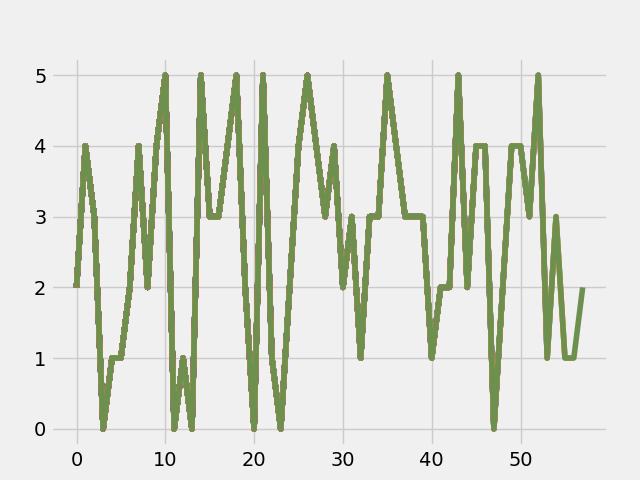

In [7]:
ani = FuncAnimation(plt.gcf(), animate1, interval=1000)

The problem (as is) is that the lines are changing colors, and that's because we are in reality, just drawing multiple lines, all above each other...

We need to delete the previous values, before drawing new ones...

In [8]:
x_vals = []
y_vals = []

index = count()

def animate2(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    plt.cla()
    plt.plot(x_vals, y_vals)

<IPython.core.display.Javascript object>


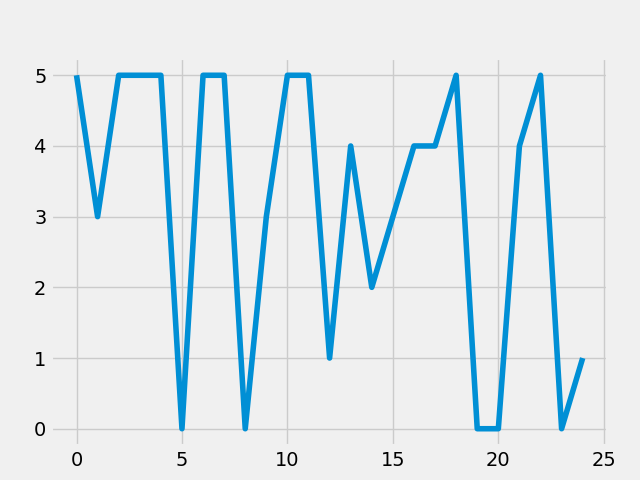

In [9]:
ani = FuncAnimation(plt.gcf(), animate2, interval=1000)

Ok, let's use some real data...

The "real" data is a CSV file, generated by a Python script (see `data_gen.py` file).

In [10]:
index = count()

def animate3(i):
    data = pd.read_csv('data09.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']
        
    plt.cla()
    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')
    plt.legend(loc='upper left')

    plt.tight_layout()

Before ploting the data below, please run the file `data_gen.py`, by goind the the command line and running

```bash
python data_gen.py
```

<IPython.core.display.Javascript object>


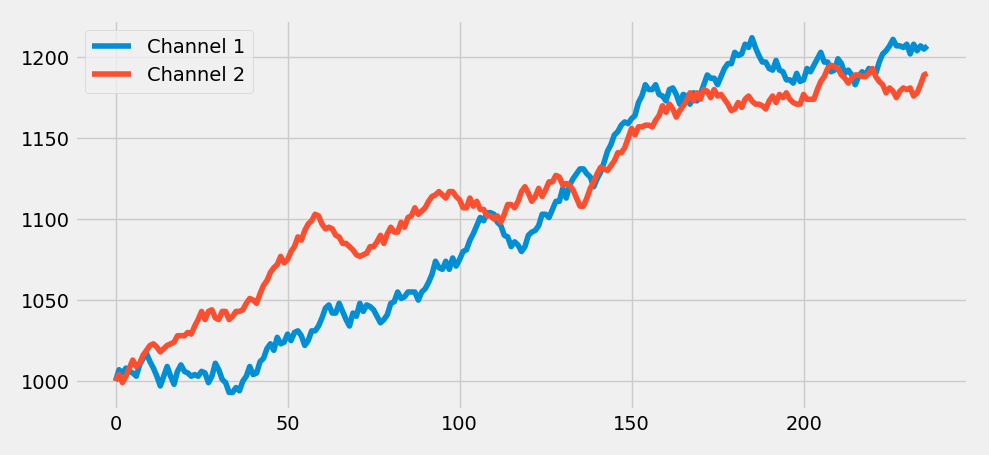

In [12]:
ani = FuncAnimation(plt.gcf(), animate3, interval=1000)